# Working with MS/MS data using HDF5

The DreaMS project introduces a new data format for MS/MS data. This format is based on HDF5 (Hierarchical Data Format 5) and is particularly suitable for machine learning applications. HDF5 is a binary, non-human-readable format that stores MS/MS data as a collection of tensors. One of these tensors contains MS/MS spectra, while the others contain metadata such as precursor m/z values. There are three main advantages of this data format compared to existing ones such as `.mzML` or `.mgf`. 
1. It allows for handling huge files containing millions of mass spectra by leveraging the on-disk nature of HDF5. This means that data can be read or processed efficiently in chunks or spectrum-by-spectrum without loading the entire dataset into memory. 
2. The tensor-based nature of HDF5 allows for seamless integration of MS/MS spectra into machine learning frameworks such as scikit-learn or PyTorch. 
3. The HDF5 format supports advanced data compression techniques, significantly reducing file size and storage requirements.

Notice that the .hdf5 data format can also be used to store complete LC-MS/MS runs, including MS1 data. We omit it in this tutorial for simplicity.

## Opening files and converting them to .hdf5

The DreaMS Python package implements the conversion of common mass spectrometry data formats, such as `.mzML` or `.mgf`, to `.hdf5`. The class responsible for this is named `MSData`. Let's look at an example of opening an `.mzML` file.

In [2]:
from dreams.utils.data import MSData
msdata = MSData.from_mzml('../data/MSV00008490/G73954_1x_BC8_01_17287.mzML')

Loading dataset G73954_1x_BC8_01_17287 into memory (1930 spectra)...


/Users/builder/jenkins/ws/enms_ntly_pyoms_whl_Release3.0.0/OpenMS/src/openms/source/FORMAT/HANDLERS/XMLHandler.cpp(130): While loading '../data/MSV00008490/G73954_1x_BC8_01_17287.mzML': Required attribute 'softwareRef' not present!
The software tool which generated this mzML should be fixed. Please notify the maintainers.


Once the `.mzML` file is parsed with `MSData.from_mzml`, it is auto converted to an `.hdf5` format and stored on disk.

In [18]:
!ls -lhtr ../data/MSV00008490/ | grep G73954_1x_BC8_01_17287

c-rw-r--r--@ 1 roman  staff    12M Jul 16 23:29 G73954_1x_BC8_01_17287.mzML
-rw-r--r--@ 1 roman  staff   4.0M Jul 20 10:35 G73954_1x_BC8_01_17287.hdf5


We can see that the data folder now contains a new `.hdf5` file with the same base name. The new file is approximately three times smaller in size, which is a result of two factors: `.hdf5` retains only MS/MS spectra and stores them in a memory-efficient tensor-based format.

Similarly, one can open and convert an `.mgf` file. If a file does not follow a standard specification for metadata names, such as naming a precursor m/z as `PEPMASS`, one can specify the correct names using constructor arguments such as `prec_mz_col`.

In [3]:
msdata = MSData.from_mgf('../data/MassSpecGym.mgf', prec_mz_col='PRECURSOR_MZ')
print(msdata)

Loading dataset MassSpecGym into memory (231104 spectra)...


MSData(pth=../data/MassSpecGym.hdf5, in_mem=True) with 231,104 spectra.

The following sections demonstrate how the content of the `.hdf5` file can be manipulated using the methods of the `MSData` class. Alternatively, one can handle the `.hdf5` file manually using the [h5py library](https://docs.h5py.org/en/stable/index.html).

## Accessing individual spectra and their metadata

Method named `at` retrieves the spectrum and all its metadata.

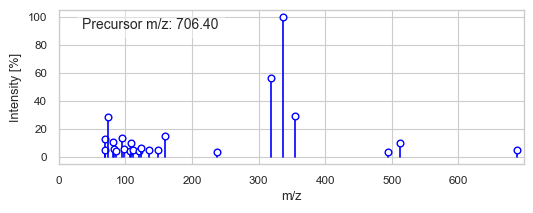

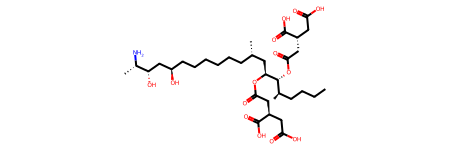

{'COLLISION_ENERGY': 30.0,
 'FOLD': 'val',
 'FORMULA': 'C34H59NO14',
 'IDENTIFIER': 'MassSpecGymID0000378',
 'INCHIKEY': 'UXDPXZQHTDAXOZ',
 'INSTRUMENT_TYPE': 'Orbitrap',
 'PARENT_MASS': 705.393024,
 'PRECURSOR_FORMULA': 'C34H60NO14',
 'SIMULATION_CHALLENGE': 'True',
 'adduct': '[M+H]+',
 'precursor_mz': 706.4003,
 'smiles': 'CCCC[C@@H](C)[C@H]([C@H](C[C@@H](C)CCCCCC[C@H](C[C@@H]([C@H](C)N)O)O)OC(=O)C[C@@H](CC(=O)O)C(=O)O)OC(=O)C[C@@H](CC(=O)O)C(=O)O'}

In [4]:
msdata.at(333)  # Random entry

## Handling all MS/MS spectra

In [24]:
spectra = msdata.get_spectra()
print(f'"spectra" object is a {type(spectra)} tensor of shape {spectra.shape} containing {spectra.dtype} elements.')

"spectra" object is a <class 'numpy.ndarray'> tensor of shape (213548, 2, 128) containing float64 elements.


The dimensions of the tensor have the following interpretation. First dimension (213548 elements) is a number of spectra. Second dimension (2 elements) represents m/z and intensity values, where first element is m/z values and second element are intensity values. Third dimension (128 elements) represents the number of signals in each spectrum. One can notice that since a tensor-shaped structre demans each dimension to have a fixed number of elements, each spectrum has the same number of signals. This was achieved during the conversion of .mzML to .hdf5. Let us look, for example, at the first spectrum.

In [15]:
# Print spectrum values without scientific notation
import numpy as np
np.set_printoptions(precision=4, suppress=True)

# Show the first spectrum
spectra[0]

array([[ 91.0542, 125.0233, 154.0499, 155.0577, 185.0961, 200.107 ,
        229.0859, 246.1125,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    , 

The spectrum has seven signals, with the rest of the elements being zeros. These zeros, often referred to as padding zeros, are used to fill the tensor up to a desired shape (let's denote this as n, where n = 128 in our case). Conversely, when a spectrum has more than n signals, only the n most intense signals are selected and stored in the tensor. The remaining signals are discarded and not stored in the file. The value of n can be controlled using the `n_highest_peaks` argument of the `MSData` constructor. To ensure that no signals are lost, one can set `n_highest_peaks` to the maximum number of peaks in the entire dataset. Since the padding zeros are effectively compressed in HDF5, this will not result in excessively large file sizes.

To remove the padding zeros, one can use the `unpad_peak_list` function from the DreaMS package.

In [25]:
from dreams.utils.spectra import unpad_peak_list
unpad_peak_list(spectra[0])

array([[ 91.0542, 125.0233, 154.0499, 155.0577, 185.0961, 200.107 ,
        229.0859, 246.1125],
       [  0.2452,   1.    ,   0.0801,   0.3554,   0.3493,   0.045 ,
          0.1421,   0.7347]])

## Handling all metadata

To retrieve all columns parsed from the input file, one can use the `columns` method.

In [36]:
msdata.columns()

['ADDUCT',
 'COLLISION_ENERGY',
 'FOLD',
 'FORMULA',
 'INCHIKEY',
 'INSTRUMENT_TYPE',
 'PARENT_MASS',
 'PRECURSOR_FORMULA',
 'SIMULATION_CHALLENGE',
 'SMILES',
 'precursor_mz',
 'spectrum']

To retrieve a column, one can either use the `get_values` method or square bracket notation. The second option is preferred, as explained in the "Working with huge files" chapter of this tutorial.

In [26]:
msdata.get_values('FORMULA')  # Or msdata['FORMULA']

array(['C16H17NO4', 'C16H17NO4', 'C16H17NO4', ..., 'C21H43N5O7',
       'C21H43N5O7', 'C21H43N5O7'], dtype='<U17')

To retrieve specific elements, one can pass indices as a second argument to `get_values` or index the column obtained with square brackets.

In [27]:
msdata.get_values('FORMULA', 0)   # Or msdata['FORMULA'][0]

'C16H17NO4'

In [28]:
msdata.get_values('FORMULA', [0, 1, 2])  # Or msdata['FORMULA'][0, 1, 2]

array(['C16H17NO4', 'C16H17NO4', 'C16H17NO4'], dtype='<U9')

The `MSData` class provides methods for more advanced functionality, such as converting spectra and their metadata to [`matchms`](https://github.com/matchms/matchms) or merging multiple `.hdf5` files. Please refer to the class reference documentation for details.

## Working with huge files

The `MSData` class enables working with huge files without loading all their content into memory. Let's look at an example of working with the large-scale [GeMS-A10 dataset](https://huggingface.co/datasets/roman-bushuiev/MassSpecGym/blob/main/data/spectra/GeMS_A10.hdf5) introduced in the DreaMS paper.

In [2]:
pth = '../data/GeMS_A10.hdf5'
!ls -lhtr ../data/GeMS_A10.hdf5

c-rw-r--r--  1 roman  staff    14G Jul 20 00:58 ../data/GeMS_A10.hdf5


The GeMS-A10 dataset takes 14 GB on disk (the uncompressed HDF5 version would take 47 GB), which is too large to fit into the RAM of an average laptop. Nevertheless, `MSData` allows for efficient handling of the file by loading only the necessary chunks of data at a time.

In [3]:
msdata = MSData.from_hdf5(pth, in_mem=False)
print(f'{pth} contains {len(msdata)} spectra.')

../data/GeMS_A10.hdf5 contains 23517534 spectra.


When setting `in_mem=False` in the `MSData` constructor, none of the spectra or their metadata are loaded into memory initially. The data is loaded only when it is accessed. Let's retrieve the first 50 spectra, for example.

In [4]:
msdata.get_spectra(range(50)).shape

(50, 2, 128)

Or 50 first precursor m/z values.

In [5]:
msdata.get_prec_mzs(range(50)).shape

(50,)

To get all precursor m/z values (load all of them into memory), one can use either of the two equivalent options.

In [6]:
msdata.get_prec_mzs().shape, msdata['precursor_mz'].shape

((23517534,), (23517534,))

However, note that using `msdata['precursor_mz'][:50]` is deprecated for large datasets because `msdata['precursor_mz']` first loads all the values into memory, and only then `[:50]` retrieves a chunk.